### Basic Image Transformations and Functions Testing ###

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Affine Transform

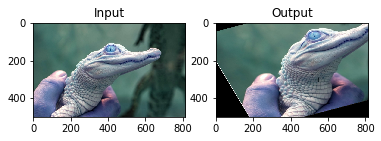

In [85]:
img = cv2.imread('img1.png')

h, w , c = img.shape

pts1 = np.array([[50, 50],
                 [200, 50],
                 [50, 200]], dtype=np.float32)

pts2 = np.array([[10, 100],
                 [200, 50],
                 [100, 250]], dtype=np.float32)

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (w, h))

plt.subplot(121)
plt.imshow(img)
plt.title('Input');

plt.subplot(122)
plt.imshow(dst)
plt.title('Output');

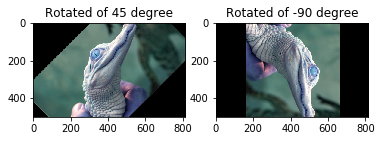

In [67]:
h, w , c = img.shape
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
plt.subplot(121)
plt.imshow(rotated)
plt.title('Rotated of 45 degree');

M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
plt.subplot(122)
plt.imshow(rotated)
plt.title('Rotated of -90 degree');


In [68]:
def affine_transform(img, pts1, pts2):
    
    h, w , c = img.shape

    M = cv2.getAffineTransform(pts1, pts2)
    output = cv2.warpAffine(img, M, (w, h))
    
    return output

In [107]:
def img_translation(img, dx, dy):
    M = np.float32([[1, 0, dx],
                    [0, 1, dy]])
    
    shifted = cv2.warpAffine(img, M, (0,0))
    
    return shifted

In [305]:
def img_rotation(img, angle, pivot, keep_full_img=False):
    
    (h, w) = img.shape[:2]
    (cX, cY) = pivot
    
    if keep_full_img:
        
        # Sum 1 to avoid [0,0,0] pixels in the source img
        # because later full black pixels will be taken out
        img = img + 1
        
        # Create space for keeping full img with stack (4 times img size and move it to the center):
        bboard = np.zeros_like(img)
        dbboard = np.hstack([bboard, bboard])
        stack = np.hstack([img, bboard])
        stack = np.vstack([stack, dbboard])
        
        # Move it to the center:
        M = np.float32([[1, 0, img.shape[1]//2],
                        [0, 1, img.shape[0]//2]])
        
        (h, w) = stack.shape[:2]
        (cX, cY) = (stack.shape[1]//2, stack.shape[0]//2)
        
        img = cv2.warpAffine(stack, M, (0,0))
                
        # Rotate new img:
        M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        
        # Get img region extremes and move desired region to (0,0)
        loc = np.where((rotated != [0,0,0]).all(axis = 2))
                        
        extTop = np.min(loc[0])
        extLeft = np.min(loc[1])
        
        M = np.float32([[1, 0, -extLeft],
                        [0, 1, -extTop]])
        
        rotated = cv2.warpAffine(rotated, M, (rotated.shape[1], rotated.shape[0]))
        
        loc = np.where((rotated != [0,0,0]).all(axis = 2))
        
        extRight = np.max(loc[0])
        extBot = np.max(loc[1])
        
        rotated = rotated[:extRight,:extBot,:] -1
    
    else:
        M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
    
    return rotated

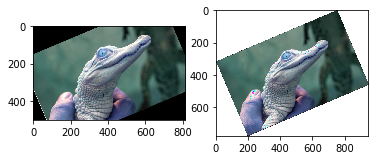

In [306]:
rot = img_rotation(img, 23, (img.shape[1]//2, img.shape[0]//2), keep_full_img=False)
    
plt.subplot(121)
plt.imshow(rot)

rot = img_rotation(img, 23, (200, 40), keep_full_img=True)
plt.subplot(122)
plt.imshow(rot)

rot = img_rotation(img, 23, (0, 0), keep_full_img=True)
plt.subplot(122)
plt.imshow(rot)

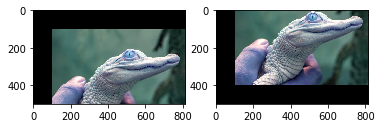

In [119]:
shift = img_translation(img.copy(), 100, -100)
plt.subplot(122)
plt.imshow(shift)

shift = img_translation(img.copy(), 100, 100)
plt.subplot(121)
plt.imshow(shift)